In [16]:
import xarray as xr
import numpy as np
from shapely.geometry import Polygon, Point
from shapely.ops import transform
import pyproj

import matplotlib.pyplot as plt

In [17]:
def point_in_polygon(lon, lat, polygon):
    point = Point(lon, lat)
    return polygon.contains(point)

In [154]:
# Example polygon coordinates (latitude,longitude)
polygon_coords = [(342,35),(360,35),(360,15), (335,15),(330,20)]
polygon = Polygon(polygon_coords)

In [155]:
# Define a transformation to ensure the polygon's CRS matches
def transform_polygon(polygon, src_crs='epsg:4326', tgt_crs='epsg:4326'):
    # Transform the polygon to match the DataArray CRS if needed
    proj = pyproj.Transformer.from_proj(pyproj.Proj(src_crs), pyproj.Proj(tgt_crs), always_xy=True)
    return transform(lambda x, y: proj.transform(x, y), polygon)

polygon_transformed = transform_polygon(polygon)


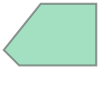

In [156]:
polygon_transformed

In [157]:
# Example data
lons = np.arange(0,360, 1)  # Longitudes
lats = np.arange(-90, 90, 1)    # Latitudes
data = np.random.rand(len(lats), len(lons))  # Random data

In [159]:
# Create DataArray
da = xr.DataArray(data, coords=[lats, lons], dims=["lat", "lon"])

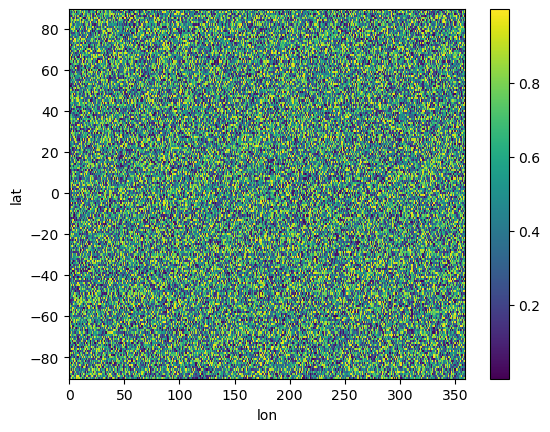

In [160]:
da.plot()

In [161]:
# Create mask array
mask = np.array([[point_in_polygon(lon, lat, polygon_transformed) for lon in da.lon.values] for lat in da.lat.values])

In [162]:
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [163]:
# Apply mask to DataArray
masked_da = da.where(mask)

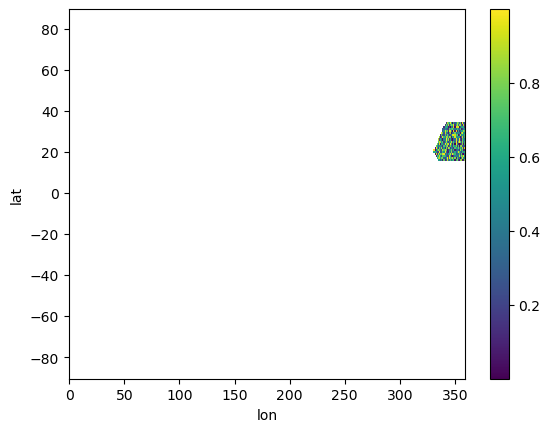

In [164]:
masked_da.plot()